# Capstone Notebook

### by Heriberto Encinas López

This Jupyter Notebook is part of a series of documents that I created for my Coursera's IBM Data Science Professional Certificate course. Here, I present you my Data Science Capstone Project

## Table of Contents

0. [Table of Contents](#Table-of-Contents)
1. [Introduction](#1.-Introduction)
2. [Data](#2.-Data)
3. [Methodology](#3.-Methodology)
    1. [Initial Data Processing](#3.1.-Initial-Data-Processing)
    2. [Exploratory Analysis](#3.2.-Exploratory-Analysis)
        1. [Date of Transaction](#3.2.1.-Date-of-Transaction)
        2. [House Age](#3.2.2.-House-Age)
        3. [Distance to nearest MRT station](#3.2.3.-Distance-to-nearest-MRT-station)
        4. [Number of convenience stores](#3.2.4.-Number-of-convenience-stores)
        5. [Latitude and Longitude](#3.2.5.-Latitude-and-Longitude)
    3. [Final Data Preparation](#3.3.-Final-Data-Preparation)
    4. [Final Data Modeling](#3.4.-Final-Data-Modeling)
4. [Results](#4.-Results)
5. [Discussion](#5.-Discussion)
6. [Conclusion](#6.-Conclusion)



## 1. Introduction

This data science capstone project will try to analyze and then solve the following problem: Real state valuation. Real state valuation is the task of assigning a monetary value to a specific property based on its attributes. These attributes relate to different aspects of the property such as: location, distance to convenience stores, size, neighborhood, etc.

Real state valuation is a complex and dynamic problem that can be affected by a variety of external factors such as: the economy, neighborhood crime rates, geology, etc. Every single aspect of everyday life can influence the value of a given house. Is it located in a decent neighborhood? Is it the right size? How old is it? The answers to these questions will probably have a direct impact on the property's final price.

This problem is of interest for the two following groups: 1) Real state agencies and 2) potential buyers (clients). For real state agencies, understanding the nuances around each of the properties they offer may help them achieve better profits when purchasing/selling a specific property. On the other hand, for potential buyers or clients, a deeper understanding of how different factors affect the price of a property may help make more appropriate decisions when purchasing/selling a specific property. 

The formal definition of the problem is as follows: Can we accurately predict the price of a given property using information such as, house age and/or location?

## 2. Data 

The data that will be used in this project is the so called “Real Estate Valuation Data Set”. This data set was obtained from the well-known UCI Machine Learning Repository. This is a multivariate data set with 414 instances. The number of attributes for each instance is 7 and there are no missing values. This data set is usually associated with Regression tasks (such as ours).

The following table describes the data set in more detail:


|Attribute name	|Description|Attribute type
| :-- |:---|---:
|No|Instance number, identifier|Numeric: Integer
|X1 transaction date|The date the transaction was made|Numeric: Real
|X2 house age|House age in years|Numeric: Real
|X3 distance to the nearest MRT station|Distance to nearest subway station|Numeric: Real
|X4 number of convenience stores|Number of convenience stores|Numeric: Integer
|X5 latitude|Latitude|Numeric: Real
|X6 longitude|Longitude|Numeric: Real
|Y house price of unit area|House price of unit area|Numeric: Real


As we can see, most of the attributes are real values, with a few exceptions that are expressed in integer. Also, most of the attributes relate to location information. Finally, the target value is a numeric (real) value which indicates the price per unit area for a given property.

In the following section this dataset will be preprocessed and analyzed further.


## 3. Methodology

In this section I will go over the whole process of data science. This section is divided into the following subsections: initial data processing, exploratory analysis, final data processing and data modeling.

### 3.1. Initial Data Processing

In [1]:
#load libraries
import pandas as pd

#load data
raw_data = pd.read_csv('realstate.csv')
raw_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


First, we will go ahead and drop the No column because this column does not provide any statistical insight. This column is just an identifier and therefore, for our purposes, it does not provide any useful information.


In [2]:
raw_data.drop(labels ='No',inplace=True,axis=1)
raw_data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Now, we will go ahead and call the describe() method from pandas. This method will give us initial statistical information about the data which we will later use to make decisions about the way we'll handle it.

In [3]:
raw_data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


As we can see, there are 414 instances for all columns (which confirms what is stated on the UCI Machine Learning Repository). Additionally, if we analyze the mean values for all columns, we will notice the following: 1) Most of the properties were sold around January 2013. 2) Most of the houses have an age close to 17.7 years. 3) Most of the houses are located within 1100 meters of an MRT station. 4) Most of the houses have around 4 convenience stores nearby. And 5) the average house price of unit area is 37.9.

Now, we will modify column names to something that is easier to read and understand. The following list shows the new names that will be applied to the dataset.

In [4]:
names = {
    'X1 transaction date':'date',
    'X2 house age':'age',
    'X3 distance to the nearest MRT station':'mrt',
    'X4 number of convenience stores':'stores',
    'X5 latitude':'latitude',
    'X6 longitude':'longitude',
    'Y house price of unit area':'price'
}
raw_data.rename(mapper=names,inplace=True,axis=1)
raw_data.head()

,date,age,mrt,stores,latitude,longitude,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### 3.2. Exploratory Analysis

In order to further understand the data, we will do an exploratory analysis. In this analysis, we will segment our data and explore each of its attributes to see how they relate to our target value. We expect that some of the attributes may have a high impact on the target value whereas some other attributes may have a lower (or nonexistent) impact.

In [5]:
#checkpoint before doing anything else
explore = raw_data.copy()

#import relevant libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as LiReg

#### 3.2.1. Date of Transaction

The first attribute we will explore is Date. We will plot the data for both date and price, and we will analyze it to see if there is any relationship between these two.

Let's plot the values of Date and Price:


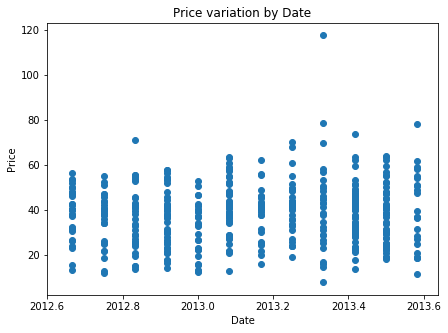

In [6]:
#select relevant columns
price = explore['price']
date = explore['date']

#plot the data
plt.figure(figsize = (7,5))
plt.scatter(date,price)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price variation by Date')
plt.xticks(np.arange(2012.6,2013.7,0.2))
plt.show()


As we can see from the previous plot, it appears that prices do not tend to vary significantly with time. We can see a slight tendency to increase (which is expected) but the overall variation over time seems small. However, there are two things we can notice: 1) there are some outliers: some properties were sold a higher price relative to the rest of the houses. And 2) the biggest increase in prices is reported between 2013.2 and 2013.4: This may have happened for a variety of reasons that cannot be determined using the available data (e.g. economic changes). However, we can see prices stabilized again after 2013.4.

A better way to visualize the general tendency of the data would be to try and fit a line to it, which is exactly what we'll do next:

In [7]:
#select data to fit
X = np.reshape(np.asarray(date[:]),(-1,1))
y = np.asarray(price[:])
#create line regressor
regressor = LiReg().fit(X,y)
#get coefficients
coef = regressor.coef_
inter = regressor.intercept_
#get line X's and  Y's
linex = np.arange(2012.6,2013.7,0.01)
liney = coef * (linex) + inter

After we have our line, we can plot it with our initial data to show the general trend.

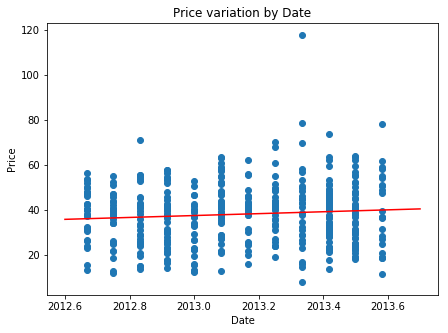

In [8]:
#select relevant columns
price = explore['price']
date = explore['date']

#plot the data
plt.figure(figsize = (7,5))
plt.scatter(date,price)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price variation by Date')
plt.xticks(np.arange(2012.6,2013.7,0.2))
#plot the line
plt.plot(linex,liney,'red')
plt.show()

As we can see from the previous plot, the line shows a general trend of increasing prices over time. However, and as we mentioned before, this trend produces small changes over time which is reflected by the line's small slope. This makes sense. Most of our data sits between 2012.6 and 2013.6 which is only a year. It would be weird to see drastic price variations in such a small period (this is, unless something important happened).

#### 3.2.2. House Age

The second attribute we will explore is House age. Once again, let's plot the data to see if we can find any trend

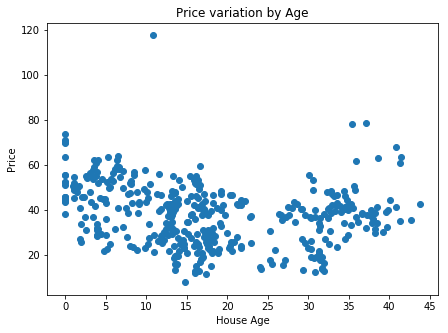

In [9]:
#select relevant columns
price = explore['price']
age = explore['age']

#plot the data
plt.figure(figsize = (7,5))
plt.scatter(age,price)
plt.xlabel('House Age')
plt.ylabel('Price')
plt.title('Price variation by Age')
plt.xticks(np.arange(0,50,5))
plt.show()

This data looks a little different. However, we can also identify a trend. We can see that for "younger" houses prices seem to be higher than for old houses (with some exceptions). Like the previous section we will fit a line to our data to see the general trend.

In [10]:
#select data to fit
X = np.reshape(np.asarray(age[:]),(-1,1))
y = np.asarray(price[:])
#create line regressor
regressor = LiReg().fit(X,y)
#get coefficients
coef = regressor.coef_
inter = regressor.intercept_
#get line X's and Y's
linex = np.arange(0,50,1)
liney = coef * (linex) + inter


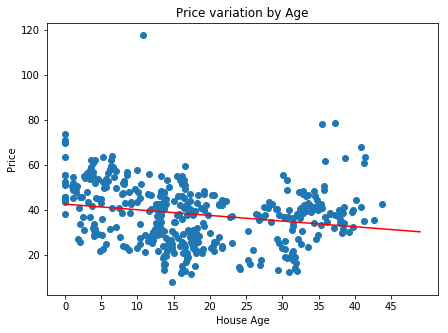

In [11]:
#select relevant columns
price = explore['price']
age = explore['age']

#plot the data
plt.figure(figsize = (7,5))
plt.scatter(age,price)
plt.xlabel('House Age')
plt.ylabel('Price')
plt.title('Price variation by Age')
plt.xticks(np.arange(0,50,5))
#plot the line
plt.plot(linex,liney,'red')
plt.show()

It appears our assessment was correct. The line shows a general trend of decreasing prices with age. Also, the line has a more pronounced slope which implies that house age has a bigger impact on price. This also makes sense, older houses are cheaper than newer ones, right? Of course, this is not the only factor that affects price, but instead is just a small piece of a bigger puzzle. 

#### 3.2.3. Distance to nearest MRT station

Now, we will explore the Distance to nearest MRT station. Let's see how the data looks like:

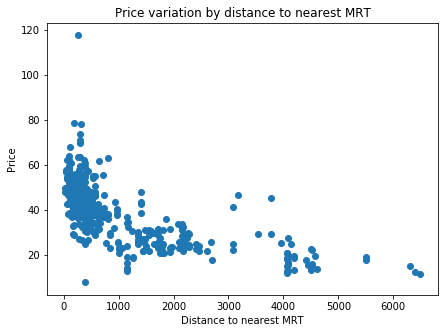

In [12]:
#select relevant columns
price = explore['price']
mrt = explore['mrt']

#plot the data
plt.figure(figsize = (7,5))
plt.scatter(mrt,price)
plt.xlabel('Distance to nearest MRT')
plt.ylabel('Price')
plt.title('Price variation by distance to nearest MRT')
plt.xticks(np.arange(0,7000,1000))
plt.show()

This is a very interesting plot. The data shows what is called an exponential shape. This is, prices decrease exponentially as the distance to the nearest MRT increases. We can see houses that are closer to a MRT have a significantly higher price than those that are far. Again, for visualization purposes, let's fit a line to our data to see the general trend.

In [13]:
#select data to fit
X = np.reshape(np.asarray(mrt[:]),(-1,1))
y = np.asarray(price[:])
#create line regressor
regressor = LiReg().fit(X,y)
#get coefficients
coef = regressor.coef_
inter = regressor.intercept_
#get line X's and Y's
linex = np.arange(0,7000,1)
liney = coef * (linex) + inter

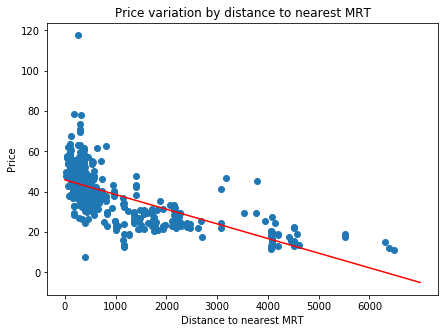

In [14]:
#select relevant columns
price = explore['price']
mrt = explore['mrt']

#plot the data
plt.figure(figsize = (7,5))
plt.scatter(mrt,price)
plt.xlabel('Distance to nearest MRT')
plt.ylabel('Price')
plt.title('Price variation by distance to nearest MRT')
plt.xticks(np.arange(0,7000,1000))
#plot the line
plt.plot(linex,liney,'red')
plt.show()

And our line just confirms what we already noticed. Distance to nearest MRT seems to have a high impact on the house's price. This, again, makes a lot of sense. Living close to an MRT or other type of public services is considered a commodity, thus, houses which are located close to them will have a price that considers such commodity.

#### 3.2.4. Number of convenience stores

Now, let's explore the data related to the number of convenience stores near each property:

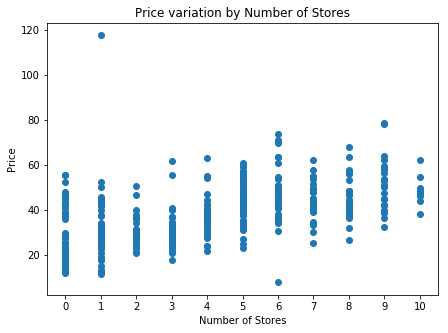

In [15]:
#select relevant columns
price = explore['price']
stores = explore['stores']

#plot the data
plt.figure(figsize = (7,5))
plt.scatter(stores,price)
plt.xlabel('Number of Stores')
plt.ylabel('Price')
plt.title('Price variation by Number of Stores')
plt.xticks(np.arange(0,11,1))
plt.show()

Here, the plot shows a trend of increasing prices with increasing number of convenience stores. Again, let's plot a line for the general trend: 

In [16]:
#select data to fit
X = np.reshape(np.asarray(stores[:]),(-1,1))
y = np.asarray(price[:])
#create line regressor
regressor = LiReg().fit(X,y)
#get coefficients
coef = regressor.coef_
inter = regressor.intercept_
#get line X's and Y's
linex = np.arange(0,11,0.1)
liney = coef * (linex) + inter

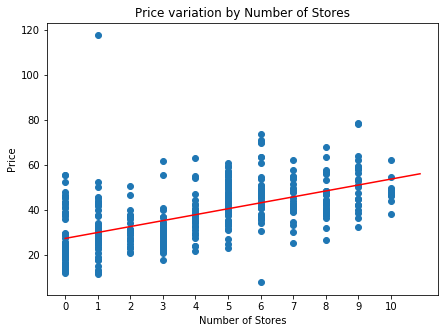

In [17]:
#select relevant columns
price = explore['price']
stores = explore['stores']

#plot the data
plt.figure(figsize = (7,5))
plt.scatter(stores,price)
plt.xlabel('Number of Stores')
plt.ylabel('Price')
plt.title('Price variation by Number of Stores')
plt.xticks(np.arange(0,11,1))
#plot the line
plt.plot(linex,liney,'red')
plt.show()

As expected, the line reflects the increasing trend that we mentioned before. The reasoning behind this is similar to the one we gave for MRT stations. Having more convenience stores nearby is a commodity, the less convenience stores there are nearby the further we may need to go to find wathever we are looking for. Thus, having more options at a reasonable distance will increase the price of the property.

#### 3.2.5. Latitude and Longitude

Now, we will explore the latitude and longitude columns. We know latitude and longitude values are used to encode location, which is a relevant attribute when discussing a property's value. However, latitude and longitude values are not as easy to interpret as the attributes we've seen before.

One way we can change this and not lose information would be to translate these numerical values into addresses. And then extract relevant information from these addresses.

The following piece of code extracts the address information for each of the properties and stores it in a list.

In [18]:
#get locations using geopy
from geopy import Nominatim
geolocator = Nominatim(user_agent='neighborhoods')
lat = explore['latitude']
lon = explore['longitude']
addresslist = []
for i in range(0,len(lat)):
    latlon = str(lat[i])+', '+str(lon[i])
    address = geolocator.reverse(latlon)
    addresslist.append(address)
print('Downloaded all the addresses')

Downloaded all the addresses


Now that we have a list with all the addresses, let's check the address for the first instance.

In [19]:
print(addresslist[0])

G2000, 民權路, 復興里, 大坪林, 新店區, 新北市, 23141, 臺灣


Unless you speak Chinese, this address does not provide much information. Let's try again with the raw response from the server:

In [20]:
print(addresslist[0].raw)

{'place_id': 59822203, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 4834782017, 'lat': '24.9830413', 'lon': '121.5402601', 'display_name': 'G2000, 民權路, 復興里, 大坪林, 新店區, 新北市, 23141, 臺灣', 'address': {'clothes': 'G2000', 'road': '民權路', 'city_district': '復興里', 'village': '大坪林', 'state_district': '新店區', 'state': '新北市', 'postcode': '23141', 'country': '臺灣', 'country_code': 'tw'}, 'boundingbox': ['24.9829413', '24.9831413', '121.5401601', '121.5403601']}


Now we can see the whole address structure. We will be focusing on the 'city_district' field for each address. Let's extract this value for all instances.

We will also include an exception in case there are any instances with no city_district value.

In [21]:
#create list
city_districts = []
#populate list
for item in addresslist:
    try:
        city_districts.append(item.raw['address']['city_district'])
    except:
        print('missing')

It appears all the addresses have a city_district value associated to them. Let's print the first 5 elements of the list:

In [22]:
#printing first 5 elements of the list
for i in range(0,5):
    print(city_districts[i])

復興里
大豐里
信義里
信義里
寶安里


To facilitate the understanding for those of us who can't speak Chinese, we will go ahead and obtain the pinyin corresponding words for all neighborhoods.

In [23]:
import pinyin

#getting pinyin
for i in range(0,len(city_districts)):
    city_districts[i] = pinyin.get(city_districts[i])
#printing first 5 elements of the list
for i in range(0,5):
    print(city_districts[i])

fùxīnglǐ
dàfēnglǐ
xìnyìlǐ
xìnyìlǐ
bǎoānlǐ


Our next step will be to find out how many city districts we are dealing with:

In [24]:
from collections import Counter
len(Counter(city_districts).keys())

60

There are 60 unique city districts. We will explore this information further, but first we will need to store it in a pandas dataframe

In [25]:
#create dataframe
districts = pd.DataFrame(columns=['district','count'] )
#store data
districts['district'] = city_districts
districts['count'] = 1
districts.head()

,district,count
0,fùxīnglǐ,1
1,dàfēnglǐ,1
2,xìnyìlǐ,1
3,xìnyìlǐ,1
4,bǎoānlǐ,1


Now, we will quickly explore this dataframe. Let's build a horizontal bar chart to see which of the city districts is the one with most properties.

In [26]:
district_grouped = districts.groupby('district').count()
district_grouped.reset_index(inplace=True)
district_grouped.head(5)

,district,count
0,bǎifúlǐ,5
1,bǎihélǐ,9
2,bǎirěnlǐ,2
3,bǎofúlǐ,9
4,bǎoxīnglǐ,8


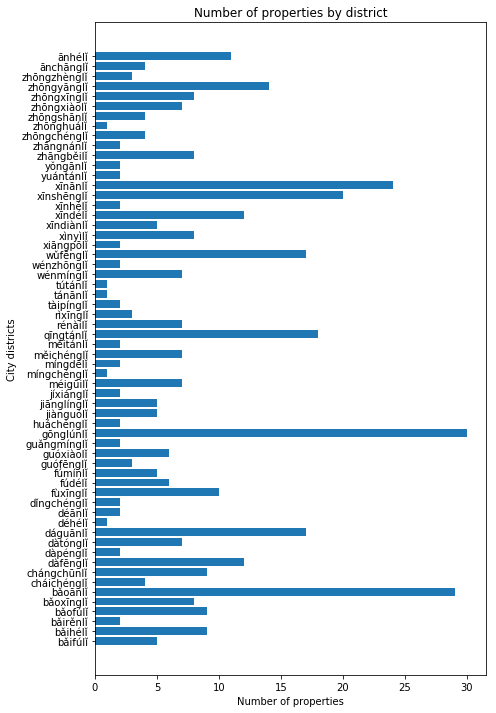

In [27]:
names = district_grouped['district']
values = district_grouped['count']
plt.figure(figsize=(7,12))
plt.barh(names,values)
plt.xlabel('Number of properties')
plt.ylabel('City districts')
plt.title('Number of properties by district')
plt.show()

The horizontal bar chart shows most of the city districts have less than 15 properties. However, there are 7 districts which have 15 properties or more:
xinanli, xinshengli, wufengli, qingtanli, gonglunli, daguanli and baoanli. Additionally, the district with most properties is gonglunli with something around 30 properties.

Now, let's plot districts vs prices to see how these two relate.

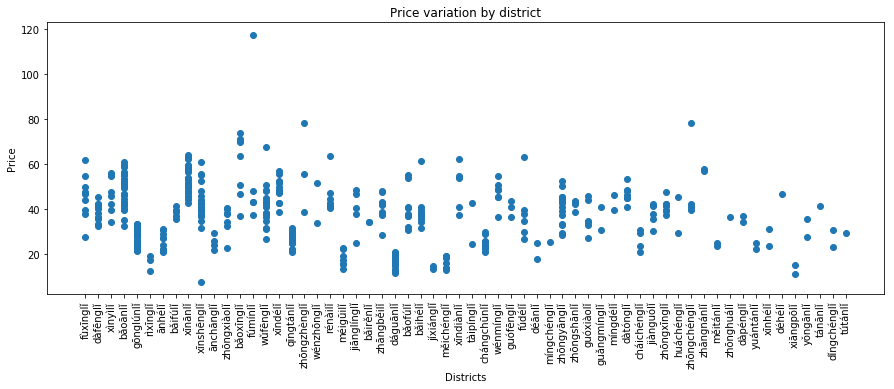

In [28]:
#select relevant columns
price = explore['price']
distr = districts['district']

#plot the data
plt.figure(figsize = (15,5))
plt.scatter(distr,price)
plt.xlabel('Districts')
plt.ylabel('Price')
plt.title('Price variation by district')
plt.xticks(rotation='vertical')
plt.show()

The graph shows a clear relationship between district and price. For some districts, houses are cheaper than for other districts. For example, the meiguili, daguanli and meichengli districts are clearly significantly cheaper than the xinanli, xindeli, and datongli districts. We can see a few outliers which, once again, indicate district is not the only factor that determines the final price.

### 3.3. Final Data Preparation

In this section, we will build the final dataset that we will later use for modeling. The first thing we'll do is to get dummy variables for each of the city districts. These variables only represent membership to a given district. Therefore, if the first instance belongs to city district A: Column corresponding to city district A will be equal to one, all other columns will be equal to zero.

In [29]:
#drop unnecessary column
districts = districts.drop('count',axis=1)
#get dummies
dummydist = pd.get_dummies(districts)
dummydist.head()

,district_bǎifúlǐ,district_bǎihélǐ,district_bǎirěnlǐ,district_bǎofúlǐ,district_bǎoxīnglǐ,district_bǎoānlǐ,district_cháichénglǐ,district_chángchūnlǐ,district_dàfēnglǐ,district_dàpénglǐ,...,district_zhāngnánlǐ,district_zhōngchénglǐ,district_zhōnghuálǐ,district_zhōngshānlǐ,district_zhōngxiàolǐ,district_zhōngxīnglǐ,district_zhōngyānglǐ,district_zhōngzhènglǐ,district_ānchānglǐ,district_ānhélǐ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, we need to combine these columns to the first four columns of our "explore" dataframe

In [30]:
names = ['date','age','mrt','stores']
finaldf = pd.DataFrame(columns=names) 
finaldf.head()
finaldf['date'] = explore['date']
finaldf['age'] = explore['age']
finaldf['mrt'] = explore['mrt']
finaldf['stores'] = explore['stores']
finaldf = finaldf.join(dummydist)
finaldf.head()


,date,age,mrt,stores,district_bǎifúlǐ,district_bǎihélǐ,district_bǎirěnlǐ,district_bǎofúlǐ,district_bǎoxīnglǐ,district_bǎoānlǐ,...,district_zhāngnánlǐ,district_zhōngchénglǐ,district_zhōnghuálǐ,district_zhōngshānlǐ,district_zhōngxiàolǐ,district_zhōngxīnglǐ,district_zhōngyānglǐ,district_zhōngzhènglǐ,district_ānchānglǐ,district_ānhélǐ
0,2012.917,32.0,84.87882,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012.917,19.5,306.59470,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013.583,13.3,561.98450,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013.500,13.3,561.98450,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012.833,5.0,390.56840,5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


After that, combine the obtained data frame with the price column from the same explore dataframe.

In [31]:
finaldf = finaldf.join(explore['price'])
finaldf.head()

,date,age,mrt,stores,district_bǎifúlǐ,district_bǎihélǐ,district_bǎirěnlǐ,district_bǎofúlǐ,district_bǎoxīnglǐ,district_bǎoānlǐ,...,district_zhōngchénglǐ,district_zhōnghuálǐ,district_zhōngshānlǐ,district_zhōngxiàolǐ,district_zhōngxīnglǐ,district_zhōngyānglǐ,district_zhōngzhènglǐ,district_ānchānglǐ,district_ānhélǐ,price
0,2012.917,32.0,84.87882,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37.9
1,2012.917,19.5,306.59470,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42.2
2,2013.583,13.3,561.98450,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,47.3
3,2013.500,13.3,561.98450,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,54.8
4,2012.833,5.0,390.56840,5,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,43.1


In [32]:
finaldf.to_csv('realstate_final_0.csv')

Now, we will normalize the first 4 columns and the last column:

In [33]:
names = ['date','age','mrt','stores']
for name in names:
    mean = finaldf[name].mean()
    std = finaldf[name].std()
    finaldf[name] = (finaldf[name] - mean)/std
finaldf.head()

,date,age,mrt,stores,district_bǎifúlǐ,district_bǎihélǐ,district_bǎirěnlǐ,district_bǎofúlǐ,district_bǎoxīnglǐ,district_bǎoānlǐ,...,district_zhōngchénglǐ,district_zhōnghuálǐ,district_zhōngshānlǐ,district_zhōngxiàolǐ,district_zhōngxīnglǐ,district_zhōngyānglǐ,district_zhōngzhènglǐ,district_ānchānglǐ,district_ānhélǐ,price
0,-0.822688,1.254111,-0.791537,2.004982,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37.9
1,-0.822688,0.156896,-0.615866,1.665488,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42.2
2,1.539289,-0.387322,-0.413515,0.307513,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,47.3
3,1.244928,-0.387322,-0.413515,0.307513,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,54.8
4,-1.120595,-1.115873,-0.549332,0.307513,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,43.1


Finally, save the dataframe in a csv file for later use.

In [34]:
finaldf.to_csv('realstate_final.csv')

### 3.4. Final Data Modeling

In this subsection we will model the data using multiple linear regression. We will use the statmodels python library, which will provide us with an easy way to extract statistical insights from our model.

First let's load our data: this is the version with scaled features and non scaled target value.

In [35]:
#read the dataset
data = pd.read_csv('realstate_final.csv',index_col=0)
data.head()

,date,age,mrt,stores,district_bǎifúlǐ,district_bǎihélǐ,district_bǎirěnlǐ,district_bǎofúlǐ,district_bǎoxīnglǐ,district_bǎoānlǐ,...,district_zhōngchénglǐ,district_zhōnghuálǐ,district_zhōngshānlǐ,district_zhōngxiàolǐ,district_zhōngxīnglǐ,district_zhōngyānglǐ,district_zhōngzhènglǐ,district_ānchānglǐ,district_ānhélǐ,price
0,-0.822688,1.254111,-0.791537,2.004982,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,37.9
1,-0.822688,0.156896,-0.615866,1.665488,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,42.2
2,1.539289,-0.387322,-0.413515,0.307513,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,47.3
3,1.244928,-0.387322,-0.413515,0.307513,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,54.8
4,-1.120595,-1.115873,-0.549332,0.307513,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,43.1


In [36]:
#extract attributes to a separate df
X = data.iloc[:,0:-1]
X.head()

,date,age,mrt,stores,district_bǎifúlǐ,district_bǎihélǐ,district_bǎirěnlǐ,district_bǎofúlǐ,district_bǎoxīnglǐ,district_bǎoānlǐ,...,district_zhāngnánlǐ,district_zhōngchénglǐ,district_zhōnghuálǐ,district_zhōngshānlǐ,district_zhōngxiàolǐ,district_zhōngxīnglǐ,district_zhōngyānglǐ,district_zhōngzhènglǐ,district_ānchānglǐ,district_ānhélǐ
0,-0.822688,1.254111,-0.791537,2.004982,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.822688,0.156896,-0.615866,1.665488,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.539289,-0.387322,-0.413515,0.307513,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.244928,-0.387322,-0.413515,0.307513,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.120595,-1.115873,-0.549332,0.307513,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#extract target to a separate df
y = data.iloc[:,-1:]
y.head()

,price
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


Now, we will go ahead and apply statsmodels. We will follow these steps: 1) add constant to our data, 2) create the model, 3) fit the model, 4) extract statistical information.

In [38]:
#import library
import statsmodels.api as sm

#add constant to data
X = sm.add_constant(X)
#create model
model = sm.OLS(y,X)
#fit the model
results = model.fit()
#print statistical information
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     18.11
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           5.08e-78
Time:                        15:52:19   Log-Likelihood:                -1367.7
No. Observations:                 414   AIC:                             2863.
Df Residuals:                     350   BIC:                             3121.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    38.7710      0.703     55.139      0.000      37.388      40.154
date                      1.5154      0.380      3.988      0.000       0.768       2.263
age                      -2.9184      0.467     -6.246      0.000      -3.837      -1.999
mrt                      -8.2957      2.068     -4.011      0.000     -12.363      -4.228
stores                    2.1409      1.084      1.974      0.049       0.008       4.274
district_bǎifúlǐ          3.4765      4.010      0.867      0.387      -4.411      11.364
district_bǎihélǐ          1.2873      2.711      0.475      0.635      -4.045       6.619
district_bǎirěnlǐ        -1.6161      5.389     -0.300      0.764     -12.215       8.982
district_bǎofúlǐ         -1.8056      2.732     -0.661      0.509      -7.179       3.567
district_bǎoxīnglǐ       14.3362      2.973      4.822      0.000       8.489      20.184
district_bǎoānlǐ          3.3313      2.137      1.559      0.120      -0.871       7.533
district_cháichénglǐ     -7.6935      3.576     -2.151      0.032     -14.727      -0.660
district_chángchūnlǐ    -11.8433      2.990     -3.961      0.000     -17.724      -5.962
district_dàfēnglǐ        -3.4699      2.597     -1.336      0.182      -8.577       1.638
district_dàpénglǐ        -4.0341      5.030     -0.802      0.423     -13.926       5.858
district_dàtónglǐ         0.0130      3.366      0.004      0.997      -6.607       6.633
district_dáguānlǐ         0.2904      4.364      0.067      0.947      -8.293       8.874
district_déhélǐ          21.5958      7.515      2.874      0.004       6.816      36.376
district_déānlǐ           1.8769      5.884      0.319      0.750      -9.696      13.449
district_dǐngchénglǐ     -8.5484      5.053     -1.692      0.092     -18.487       1.390
district_fùxīnglǐ         0.6366      2.888      0.220      0.826      -5.044       6.317
district_fúdélǐ           1.9456      3.334      0.584      0.560      -4.612       8.503
district_fúmínlǐ         17.9110      3.866      4.633      0.000      10.308      25.514
district_guófēnglǐ       -3.4186      4.423     -0.773      0.440     -12.118       5.281
district_guóxiàolǐ       -8.2249      3.315     -2.481      0.014     -14.745      -1.705
district_guǎngmínglǐ     -6.8331      5.224     -1.308      0.192     -17.107       3.441
district_gōnglúnlǐ       -5.3785      1.754     -3.067      0.002      -8.827      -1.930
district_huáchénglǐ      16.7248      6.085      2.748      0.006       4.756      28.693
district_jiànguólǐ       -3.0210      3.485     -0.867      0.387      -9.875       3.833
district_jiānglínglǐ     -1.8768      3.603     -0.521      0.603      -8.962       5.209
district_jíxiánglǐ        1.4185      6.864      0.207      0.836     -12.082      14.919
district_méigūilǐ      

This table shows statistical information about our model. From this table we can see the following
 1. Dependent variable: price, our target is correct. We are using our data to try to predict price.
 2. R-Squared: our model has an R-Squared value of 0.765. This is decent. This value needs to be close to one. Right now, this value means our model can explain 76% of the variability of the data.
 3. Adj. R-Squared: this value is similar to the previous value, but it takes into account the number of variables we are using. The fact that this value is smaller than the previous one means we are using too many variables. Some of our variables are irrelevant.
 4. F-statistic: this value indicates how significant our model is, the higher, the better.

Now, how can we improve the model? Let's start by trying to identify which of our variables are irrelevant. To do this, we will check the P values for each of the variables on the previous table.

We can see that our first 5 variables (const, date, age, mrt and stores) have a P value < 0.05 which is good. Any variable with a P value higher than that can be considered irrelevant, it is not contributing much to the model.

Let's go ahead and choose only variables with a P value < 0.05

In [39]:
tokeep=['const',
        'date',
        'age',
        'mrt',
        'stores',
        'district_bǎoxīnglǐ',
        'district_cháichénglǐ',
        'district_chángchūnlǐ',
        'district_déhélǐ',
        'district_fúmínlǐ',
        'district_guóxiàolǐ',
        'district_gōnglúnlǐ',
        'district_huáchénglǐ',
        'district_měichénglǐ',
        'district_měitánlǐ',
        'district_qīngtánlǐ',
        'district_tàipínglǐ',
        'district_tánānlǐ',
        'district_zhōngzhènglǐ',
        'district_ānhélǐ'
]
X = X[tokeep]
X.head()

,const,date,age,mrt,stores,district_bǎoxīnglǐ,district_cháichénglǐ,district_chángchūnlǐ,district_déhélǐ,district_fúmínlǐ,district_guóxiàolǐ,district_gōnglúnlǐ,district_huáchénglǐ,district_měichénglǐ,district_měitánlǐ,district_qīngtánlǐ,district_tàipínglǐ,district_tánānlǐ,district_zhōngzhènglǐ,district_ānhélǐ
0,1.0,-0.822688,1.254111,-0.791537,2.004982,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,-0.822688,0.156896,-0.615866,1.665488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1.539289,-0.387322,-0.413515,0.307513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1.244928,-0.387322,-0.413515,0.307513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,-1.120595,-1.115873,-0.549332,0.307513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


From this analysis, we can extract the following insights:

1. Date of transaction, house age, distance to mrt, and number of stores are very relevant when determining the property's price.
2. Location is relevant attribute. However, it appears this importance can be narrowed to a select group of districts. Specifically, 15 districts which are listed above.

Now let's see how a new model performs:

In [40]:
#create model
model = sm.OLS(y,X)
#fit model
results = model.fit()
#print summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     52.80
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           9.93e-96
Time:                        15:52:19   Log-Likelihood:                -1405.7
No. Observations:                 414   AIC:                             2851.
Df Residuals:                     394   BIC:                             2932.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    39.1124      0.435     89.974      0.000      38.258      39.967
date                      1.4736      0.372      3.958      0.000       0.742       2.205
age                      -3.0322      0.384     -7.900      0.000      -3.787      -2.278
mrt                      -6.8892      0.497    -13.858      0.000      -7.867      -5.912
stores                    2.7429      0.529      5.183      0.000       1.702       3.783
district_bǎoxīnglǐ       14.5688      2.676      5.444      0.000       9.307      19.830
district_cháichénglǐ     -8.3603      3.734     -2.239      0.026     -15.702      -1.019
district_chángchūnlǐ    -11.2023      2.646     -4.234      0.000     -16.404      -6.000
district_déhélǐ          19.7467      7.461      2.647      0.008       5.078      34.416
district_fúmínlǐ         18.9065      3.444      5.490      0.000      12.136      25.677
district_guóxiàolǐ       -8.0470      3.061     -2.629      0.009     -14.065      -2.029
district_gōnglúnlǐ       -6.6564      1.477     -4.508      0.000      -9.559      -3.753
district_huáchénglǐ      14.2528      5.345      2.667      0.008       3.744      24.761
district_měichénglǐ     -15.0907      2.983     -5.059      0.000     -20.955      -9.226
district_měitánlǐ       -11.9195      5.295     -2.251      0.025     -22.330      -1.509
district_qīngtánlǐ       -8.1784      1.891     -4.324      0.000     -11.897      -4.460
district_tàipínglǐ      -10.6959      5.253     -2.036      0.042     -21.023      -0.369
district_tánānlǐ         19.4843      7.482      2.604      0.010       4.775      34.194
district_zhōngzhènglǐ    18.0271      4.335      4.159      0.000       9.505      26.549
district_ānhélǐ         -11.0290      2.291     -4.814      0.000     -15.533      -6.525
==============================================================================
Omnibus:                      158.004   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2289.236
Skew:                           1.207   Prob(JB):                         0.00
Kurtosis:                      14.264   Cond. No.                         26.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Things to note on our new model:

1. All the variables are relevant: all the variables have small P values which indicates they are relevant to the model.
2. The F-Statistic increased to 52.80 from 18. This model is more significant than our previous model. It is better.

This is a better model that can explain the almost the same percentage of variability in the data using a smaller number of variables and with a higher significance.

Now, we are going to do a small test. We will choose a random instance, let's say instance 75 and compare the true value of price with the value that our model predicts. 

In [41]:
#i =  the instance we want to test
i = 75
#values for instance i
point1 = X.iloc[i,:]
#our model's parameters
coef = results.params
#compute the predicted price
result = np.dot(np.asarray(point1),np.asarray(coef))
print('This is the predicted price: %0.2f'%result)
#get the true price
ypoint1 = y.iloc[i,0]
print('This is the true price: %0.2f'%ypoint1)
#print % difference
diff = abs(result-ypoint1)
avg = (result+ypoint1)/2
div = diff/avg
perc = div*100
print('Percentage difference: %0.2f'%perc)

This is the predicted price: 29.82
This is the true price: 29.50
Percentage difference: 1.08


## 4. Results

We were able to develop a significant model that is capable of explaining a decent percentage of variation within the data. It is possible that more complex models or more rich datasets achieve better results. 

However, for our purposes we were able to find a model that performed well. To achieve better results I would suggest using more complex models such as K-Nearest Neighbors or Polynomial Regression. 

The obtained results can be seen as the base to make further improvements, maybe using the well-known Sklearn library.

## 5. Discussion

After analyzing the information, I would make the following suggestions:

1. First, I would reccommend focusing on those districts that we pinpointed as the most relevant when determining the price.
2. I would also reccommend exploring the possibility of gathering data related to other factors such as: How many schools the district has? How close it is to other transportation services such as bus, or airport, etc.? Including more of these variables will provide us with a better look at the whole picture.
3. Instead of latitude and longitude values try to get more meaningful information such as neighborhood, city district, village, etc. Attributes that segment the data into more meaningful subsets.

## 6. Conclusion

This is the conclusion to my capstone project. In this project we took information related to real state for different properties in the city of New Taipei in Taiwan. The data set was processed, relevant information was extracted, and a multi-linear regression model was built. 

From these models several insights were obtained: The relevancy of some variables was confirmed as was previously suspected during the exploratory analysis phase. In addition to this, for the location variable, a group of highly relevant city districts was identified.

We were able to build a significant model that requires less information than what we initially had. Additionally, we were able to pinpoint those attributes that have the most impact on the final price.